# Ex1

Desenvolva funções para as operações básicas de Morfologia Matemática discutidas no curso em imagens binárias:

1. Dilatação
2. Erosão
3. Abertura
4. Fechamento

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# show image 1 and image 2
def show_img(img1, img2):
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)

  fig.add_subplot(1,2,1)
  plt.imshow(img1, cmap='gray')

  # display the new image
  fig.add_subplot(1,2,2)
  plt.imshow(img2, cmap='gray')

  plt.show(block=True)

In [ ]:
def add_padding(image, padding, value):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=value)

In [ ]:
# erode an image
def erode(image, st_element, padding=0):
    img_n = image.copy()

    padding_value = 1
    img_padded = add_padding(image, padding, padding_value)

    m = img_padded.shape[0] - st_element.shape[0] #final vertical window position
    n = img_padded.shape[1] - st_element.shape[1] #final horizontal window position

    for y in range(m):
        for x in range(n):
            erosion = False

            # gives the index position of the structure element
            for i in range(st_element.shape[0]):
                for j in range(st_element.shape[1]):
                    if st_element[i][j] == 1:         
                        #if we find 0, then break the second loop
                        if img_padded[y+i][x+j] == 0:
                            erosion = True                            
                            break

                # if erosion then set intensity to 0
                if erosion:
                    img_n[y, x] = 0
                    break

    return img_n

In [ ]:
# dilate an image
def dilate(image, st_element, padding=0):
    img_n = image.copy()

    padding_value = 0
    img_padded = add_padding(image, padding, padding_value)

    m = img_padded.shape[0] - st_element.shape[0] #final vertical window position
    n = img_padded.shape[1] - st_element.shape[1] #final horizontal window position

    for y in range(m):
        for x in range(n):
            dilation = False

            # gives the index position of the structure element
            for i in range(st_element.shape[0]):
                for j in range(st_element.shape[1]):
                    if st_element[i][j] == 1:         
                        #if we find 0, then break the second loop
                        if img_padded[y+i][x+j] == 255:
                            dilation = True                            
                            break

                # if erosion then set intensity to 0
                if dilation:
                    img_n[y, x] = 255
                    break

    return img_n

In [ ]:
# image opening operation
def opening(img, element):
  img_e = erode(img, element)
  img_d = dilate(img_e, element)
  return img_d

In [ ]:
# image closing operation
def closing(img, element):
  img_d = dilate(img, element)
  img_e = erode(img_d, element)
  return img_e

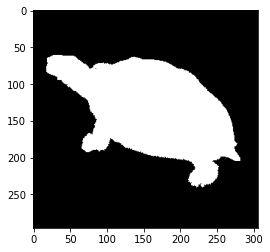

In [ ]:
# get test image
image_aux = Image.open('/content/drive/MyDrive/datasets/pid/turtle-1.gif')
image1 = np.asarray(image_aux)
plt.imshow(image1, cmap='gray')

In [ ]:
# element for erosion or dilation
element = np.asarray([[1,1,1],
                      [1,1,1],
                      [1,1,1]])

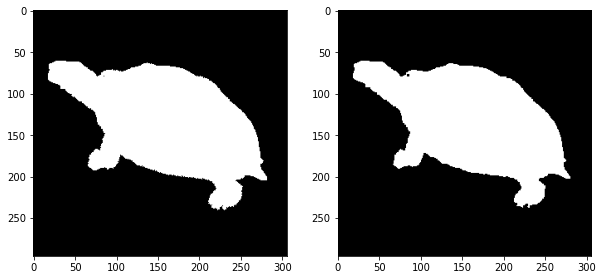

In [ ]:
# erode an image with given structure element
image1e = erode(image1, element)
show_img(image1, image1e)

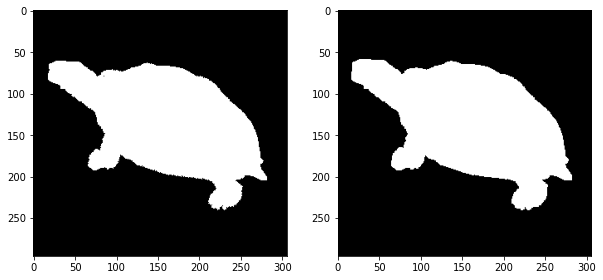

In [ ]:
# dilate an image with given structure element
image1d = dilate(image1, element)
show_img(image1, image1d)

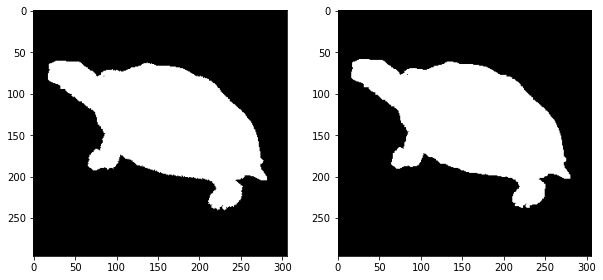

In [ ]:
# opening an image
image1o = opening(image1, element)
show_img(image1, image1o)

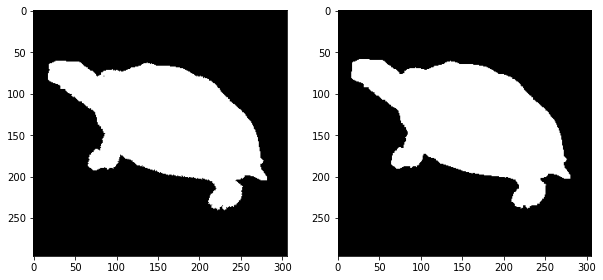

In [ ]:
# closing an image
image1c = closing(image1, element)
show_img(image1, image1c)